<a href="https://colab.research.google.com/github/ASN-Lab/Struktur-Data/blob/main/2420506031_Strukdat_Djikstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playground

Instalasi

In [ ]:
!pip install networkx matplotlib

Struktur Data Graf dan Algoritma

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def djikstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

Fungsi untuk Merekonstruksi Jalur

In [ ]:
def get_path(previous, target):
  path = []
  while target is not None:
    path.insert(0, target)
    target = previous[target]
  return path

Visualisasi dengan networkx dan matplotlib

In [ ]:
def visualize_graph(graph, path=None):
  G = nx.DiGraph()

  for node in graph:
    for neighbor, weight in graph[node].items():
      G.add_edge(node, neighbor, weight=weight)

  pos = nx.spring_layout(G)
  edge_labels = nx.get_edge_attributes(G, 'weight')

  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  # Garis tebal untuk jalur terpendek
  if path and len(path) > 1:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

  plt.title("Visualisasi Graf dan Jalur Terpendek")
  plt.axis('off')
  plt.show()

Penggunaan

jarak dari A ke Z: 14
Jalur: A --> B --> D --> E --> Z


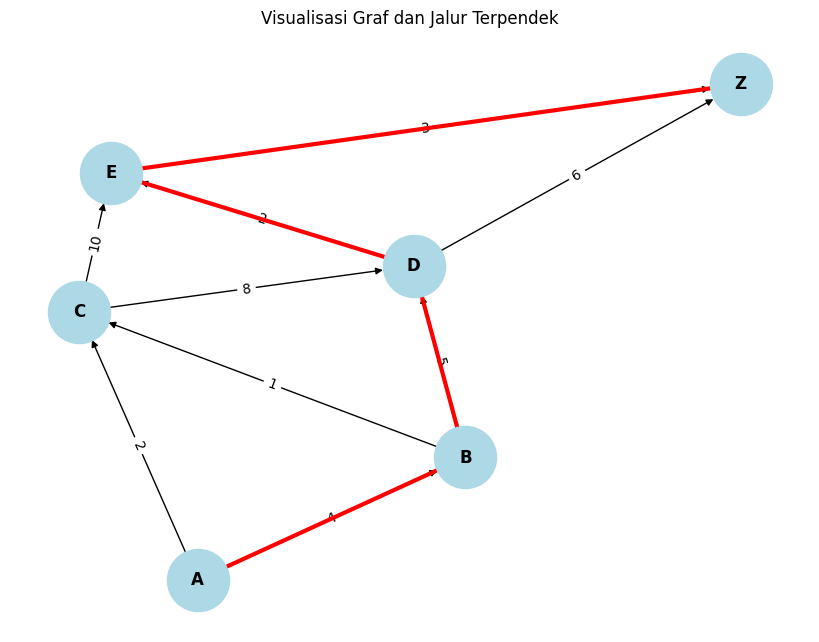

In [ ]:
# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan Djikstra
start_node = 'A'
end_node = 'Z'
distances, previous = djikstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' --> '.join(shortest_path)}" )

# Visualisasi
visualize_graph(graph, path=shortest_path)

# Tugas/Latihan

Memodifikasi graf agar memiliki siklus, penambahan simpil baru, dan penggunaan tata letak `pos = nx.circular_layout(G)` dan `kamada_kawai_layout`



## Tata letak `pos = nx.circular_layout(G)`

In [ ]:
# Instalasi
!pip install networkx matplotlib

jarak dari A ke Z: 9
Jalur: A-->C-->D-->E-->Z


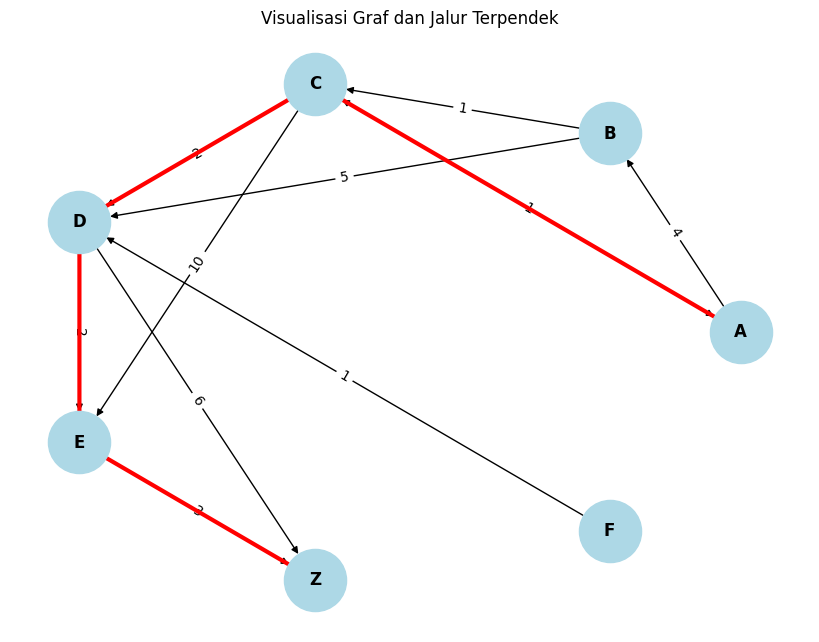

In [ ]:
# Algoritma dan Graf
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def djikstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target): # Fungsi rekonstruksi jalur
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None): # Visualisasi
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.circular_layout(G)  # Ganti tata letak menjadi circular
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Garis tebal untuk jalur terpendek
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

# Penggunaan
graph = { # Definisi graf dengan siklus dan simpul baru
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 2, 'E': 10, 'A': 1},  # Menambahkan siklus dari C ke A
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'F': {'D': 1},  # Menambahkan simpul baru F yang terhubung ke D
    'Z': {}
}

# Jalankan Djikstra
start_node = 'A'
end_node = 'Z'
distances, previous = djikstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {'-->'.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)

## Tata letak `kamada_kawai_layout`


In [ ]:
# Instalasi
!pip install networkx matplotlib

jarak dari A ke Z: 14
Jalur: A-->B-->D-->E-->Z


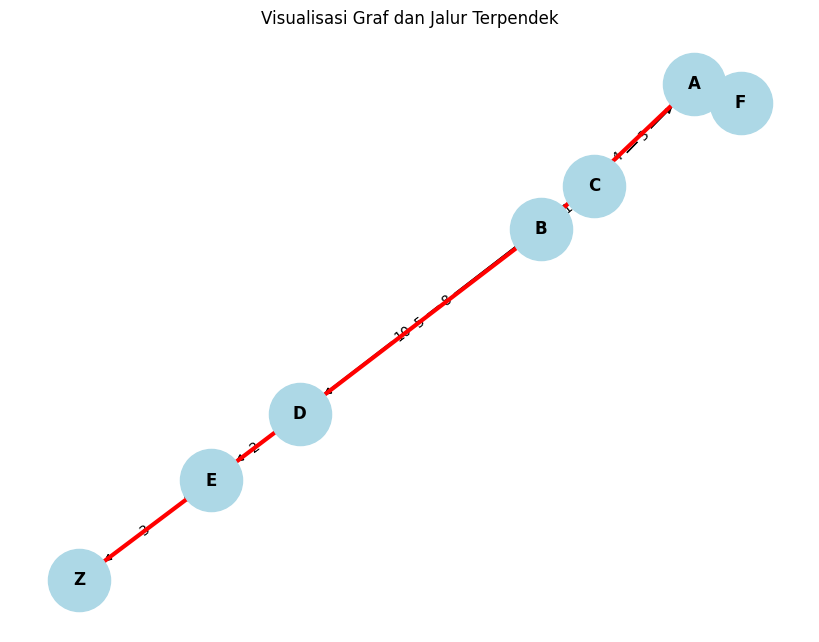

In [ ]:
# Algoritma dan Graf
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def djikstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target): # Fungsi rekonstruksi jalur
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None): # Visualisasi
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.kamada_kawai_layout(G)  # Ganti tata letak menjadi kamada_kawai
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Garis tebal untuk jalur terpendek
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

# Penggunaan
graph = { # Definisi graf dengan siklus dan simpul baru
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10, 'A': 3},  # Menambahkan siklus dari C ke A
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'F': {'A': 1},  # Menambahkan simpul baru F yang terhubung ke A
    'Z': {}
}

# Jalankan Djikstra
start_node = 'A'
end_node = 'Z'
distances, previous = djikstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {'-->'.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)